img_path:图像地址 \
img：原图 \
img_gray,b,g,r \
show_plt((img,)) show_tuple(cv_method,(img,)) 

In [1]:
# 原始图像地址
import numpy as np
import cv2
from matplotlib import pyplot as plt
# img_path="/home/wzc/zlt_self/ZNewMyModel/data/Drishti-GS/test/disc_small/image/gdrishtiGS_005.png"
# img_path="/home/wzc/zlt_self/pOSAL-master/data/Drishti-GS/test/disc_small/image/gdrishtiGS_003.png"
# img_path="/home/wzc/zlt_self/pOSAL-master/data/Drishti-GS/test/disc_small/image/gdrishtiGS_028.png"
img_path="/home/wzc/zlt_self/pOSAL-master/data/refuge/train0/disc_small/image/n0112.png"


img = cv2.imread(img_path)
img_gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
b,g,r = cv2.split(img)

def show_plt(imgs_tuple=(img_gray,b,g,r)):
    """ 图像显示。传参：图像元组 返回值：无 """
    out_imgs=np.hstack(imgs_tuple)
    out_imgs = cv2.cvtColor(out_imgs,cv2.COLOR_RGBA2BGR)
    plt.imshow(out_imgs)


def show_tuple(method_,imgs_tuple=(img_gray,b,g,r)):
    """ 显示处理后的图像。传参：图像处理方法；
        返回值：图像元组。
    """
    img_tuple=list()
    for x_ in imgs_tuple:
        img_tuple.append(method_(x_))
    show_plt(tuple(img_tuple))
    return img_tuple

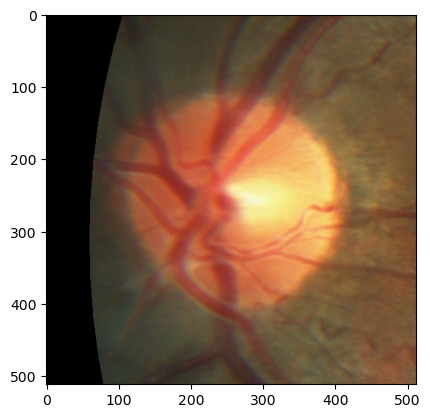

In [2]:
show_plt((img,))

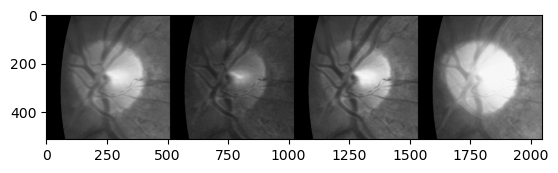

In [3]:
show_plt((img_gray,b,g,r))


In [4]:
g=r

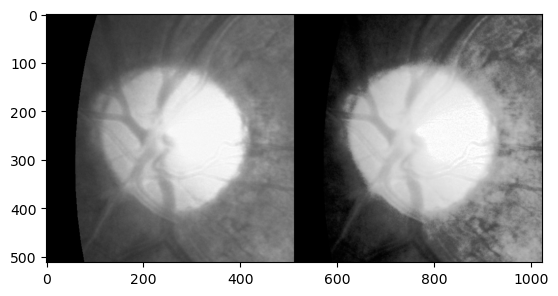

In [5]:
g_=g.copy()
g_=cv2.equalizeHist(g_)
show_plt((g,g_))

kmeas聚类

centers[[197.1093 ]
 [ 75.59375]]


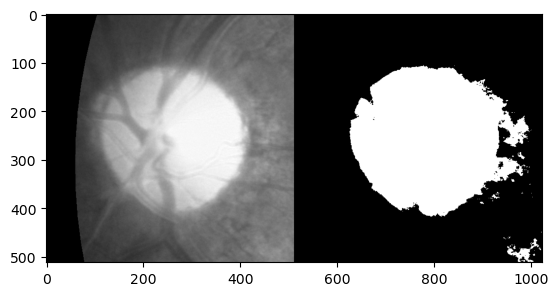

In [6]:
def kmeans(roi):
    ## K-Means
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
    flags = cv2.KMEANS_RANDOM_CENTERS
    X = roi.reshape((-1, 1))
    X = np.float32(X)
    compactness,labels,centers = cv2.kmeans(X,2,None,criteria,2,flags)
    print(f"centers{centers}")
    color_=[[0],[255]]
    if(labels[0]==1):
        color_=[[255],[0]]
    color_ = np.uint8(color_)
    res= color_[labels.flatten()]
    res2 = res.reshape((roi.shape))
    return res2
g_=g.copy()
g_=kmeans(g_)
show_plt((g,g_))

centers[[ 75.92861]
 [197.87502]]


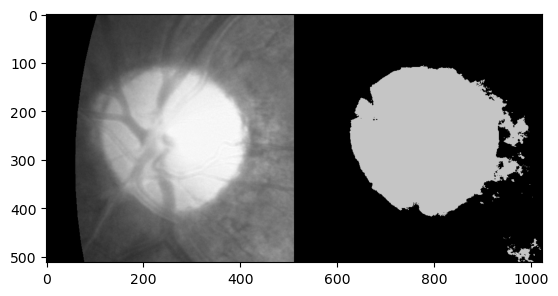

In [15]:
def kmeans(roi):
    ## K-Means
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
    flags = cv2.KMEANS_RANDOM_CENTERS
    X = roi.reshape((-1, 1))
    X = np.float32(X)
    compactness,labels,centers = cv2.kmeans(X,2,None,criteria,2,flags)
    print(f"centers{centers}")
    # color_=[[0],[255]]
    # if(labels[0]==1):
    #     color_=[[255],[0]]
    centers[labels[0]]=[0]
    centers = np.uint8(centers)
    res= centers[labels.flatten()]
    res2 = res.reshape((roi.shape))
    return res2
g_=g.copy()
g_=kmeans(g_)
show_plt((g,g_))

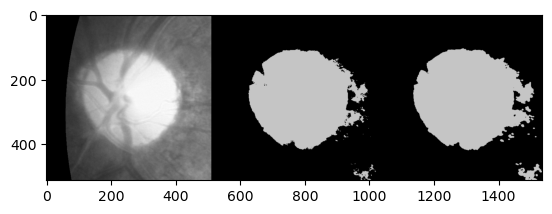

In [8]:
def dilate_img(thresh3):
    # 腐蚀膨胀
    # kernel = np.ones((55, 55), np.uint8)
    # closing = cv2.morphologyEx(thresh3, cv2.MORPH_CLOSE, kernel)
    kernel1 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
    dst = cv2.dilate(thresh3, kernel1)
    return dst
dilate_img_=dilate_img(g_.copy())
show_plt((g,g_,dilate_img_))

Hough变换

(1, 1, 3)
circles--[[268 262 157]]
type(HoughCircles_img)---<class 'numpy.ndarray'>


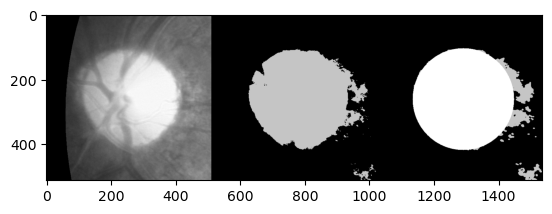

In [9]:
HoughCircles_img=dilate_img_.copy()
circle1 = cv2.HoughCircles(HoughCircles_img, cv2.HOUGH_GRADIENT, 1, 3000, param1=200, param2=0.9, minRadius=100, maxRadius=256)  #把半径范围缩小点，检测内圆，瞳孔
print(circle1.shape)
circles = circle1[0, :, :]  # 提取为二维
circles = np.uint16(np.around(circles))  # 四舍五入，取整
print(f"circles--{circles}")
# radis_max=0
# for i in circles[:]:
#     if i[2]>radis_max:
#         radis_max=i[2]
for i in circles[:]:
    cv2.circle(HoughCircles_img, (i[0], i[1]), i[2], 255, -1)  # 画圆
    # cv2.circle(HoughCircles_img, (i[0], i[1]), i[2]+60, (255, 0, 0), -1)  # 画圆
    # cv2.circle(HoughCircles_img, (i[0], i[1]), 2, 255, 10)  # 画圆心
print(f"type(HoughCircles_img)---{type(HoughCircles_img)}")
show_plt((g,g_,HoughCircles_img))

In [10]:
circles

array([[268, 262, 157]], dtype=uint16)

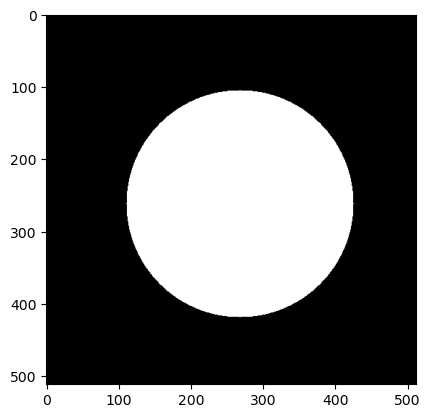

In [11]:
xxx__=cv2.circle(g.copy(), (circles[0][0], circles[0][1]), circles[0][2], 255, -1)  # 画圆
_,m__=cv2.threshold(xxx__,200,255,cv2.THRESH_BINARY)
show_plt((m__,))

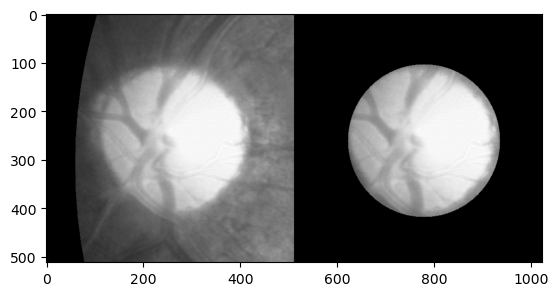

In [12]:
img_hough=g.copy()
img_hough = cv2.add(img_hough, np.zeros(np.shape(img_hough), dtype=np.uint8), mask=m__)
show_plt((g,img_hough))
